In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time

In [10]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
print("Numero totale di proprietà: "+str(X_train.shape[1]))
print("Esempi di training: "+str(X_train.shape[0]))
print("Esempi di test: "+str(X_test.shape[0]))

Numero totale di proprietà: 784
Esempi di training: 60000
Esempi di test: 10000


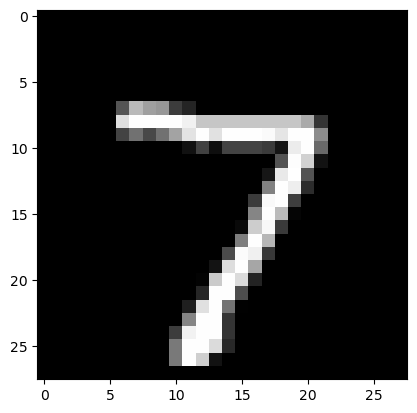

In [11]:
plt.imshow(X_test[0].reshape([28,28]), cmap='gray')

In [12]:
Y_test[0]

7

Eseguo la normalizzazione, FONDAMENTALE per poi applicare PCA

In [13]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

Eseguo una regressione logistica

In [17]:
lr = LogisticRegression(max_iter=1000)
start_time = time.time()                    #voglio contare quanto ci mette l'addestramento 
lr.fit(X_train, Y_train)
end_time = time.time()
end_time-start_time

36.91154217720032

Valuto le metriche di accuracy e log loss

In [20]:
acc_train = accuracy_score(Y_train, lr.predict(X_train))
acc_test = accuracy_score(Y_test, lr.predict(X_test))

loss_train = log_loss(Y_train, lr.predict_proba(X_train))
loss_test = log_loss(Y_test, lr.predict_proba(X_test))
print(acc_train, acc_test)
print(loss_train, loss_test)

0.9388166666666666 0.9262
0.22277931236251663 0.27198567324777584


Utilizziamo la PCA per ridurre la dimensionalità senza distruggere le metriche

In [23]:
pca = PCA(0.95)             #non passo il numero di componenti ma in quanta varianza voglio in percentuale
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape                       #le proprietà adesso sono 154, al posto di 784, rinunciando al 5% di varianza totale

(60000, 154)

Riaddestro il modello di regressione logistica

In [24]:
lr = LogisticRegression(max_iter=1000)
start_time = time.time()                    #voglio contare quanto ci mette l'addestramento 
lr.fit(X_train_pca, Y_train)
end_time = time.time()
end_time-start_time

6.217350721359253

In [25]:
acc_train_pca = accuracy_score(Y_train, lr.predict(X_train_pca))
acc_test_pca = accuracy_score(Y_test, lr.predict(X_test_pca))

loss_train_pca = log_loss(Y_train, lr.predict_proba(X_train_pca))
loss_test_pca = log_loss(Y_test, lr.predict_proba(X_test_pca))
print(acc_train_pca, acc_test_pca)
print(loss_train_pca, loss_test_pca)                                #Buoni risultati (peggiorati di poco)

0.9271333333333334 0.9233
0.26246972512896305 0.2704786178548263


Vedo cosa succede riducendo la varianza al 90%

In [26]:
pca = PCA(0.90)             #non passo il numero di componenti ma in quanta varianza voglio in percentuale
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

lr = LogisticRegression(max_iter=1000)
start_time = time.time()                    #voglio contare quanto ci mette l'addestramento 
lr.fit(X_train_pca, Y_train)
end_time = time.time()
print(end_time-start_time)

acc_train_pca = accuracy_score(Y_train, lr.predict(X_train_pca))
acc_test_pca = accuracy_score(Y_test, lr.predict(X_test_pca))

loss_train_pca = log_loss(Y_train, lr.predict_proba(X_train_pca))
loss_test_pca = log_loss(Y_test, lr.predict_proba(X_test_pca))
print(acc_train_pca, acc_test_pca)
print(loss_train_pca, loss_test_pca)                                #guadagno in tempi e perdo poche metriche

0.9203 0.9196
0.28422387869861687 0.28261060219822426


Riprovo con un algoritmo di ottimizzazione lbfgs

In [27]:
pca = PCA(0.90)             #non passo il numero di componenti ma in quanta varianza voglio in percentuale
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

lr = LogisticRegression(max_iter=1000, solver='lbfgs')
start_time = time.time()                    #voglio contare quanto ci mette l'addestramento 
lr.fit(X_train_pca, Y_train)
end_time = time.time()
end_time-start_time

acc_train_pca = accuracy_score(Y_train, lr.predict(X_train_pca))
acc_test_pca = accuracy_score(Y_test, lr.predict(X_test_pca))

loss_train_pca = log_loss(Y_train, lr.predict_proba(X_train_pca))
loss_test_pca = log_loss(Y_test, lr.predict_proba(X_test_pca))
print(acc_train_pca, acc_test_pca)
print(loss_train_pca, loss_test_pca)                                #ci sta di più con le stesse metriche

(60000, 87)
0.9203 0.9196
0.28422387869861687 0.28261060219822426
